In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import csv

In [2]:
data_path = '/home/gonzalez/Desktop/age_gender/age_gender.csv'
url = 'https://www.kaggle.com/code/shahraizanwar/age-gender-ethnicity-prediction/data?select=age_gender.csv'

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.columns

Index(['age', 'ethnicity', 'gender', 'img_name', 'pixels'], dtype='object')

# from google colab

In [14]:
from google.colab import drive 
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/age_gender.csv')

 # Transforming the pixels data type into a list of float

In [ ]:
# images =[]
# for fotos in range(len(data['pixels'])):
#     X = data['pixels'][fotos].split(" ")
#     X = list(map(int, X))
#     images.append(X)

In [ ]:
# x = np.reshape(images[5000], (48,48))

In [5]:
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [ ]:
blob = data['pixels'][0].reshape(48,48)

In [ ]:
plt.imshow(blob, cmap='gray');

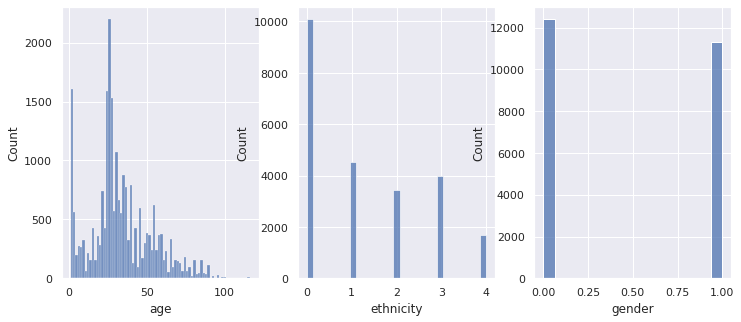

In [33]:
#sns.displot(data['ethnicity']),
#sns.displot(data['gender']), 
#sns.displot(data['age']);
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.histplot(ax=axes[0], x=data['age']);
sns.histplot(ax=axes[1], x=data['ethnicity']);
sns.histplot(ax=axes[2], x=data['gender']);

# Working with the age

In [41]:
data['age'].unique()
np.count_nonzero(data['age']==)
# Working here

734

# Function for transforming data numbers into data range classification

In [ ]:
# categorize age per range:
def age_categorize(input_list, age_step=10):
    '''
    Enter the list of age into input_list and the age steps
    with : age_step = 5;  age = 4   =>  1-5
                          age = 12  =>  10-15                        
    '''
    
    cat_age = []
    for age in input_list:
        
        a = float(age)/float(age_step)
        
        if a > 1:
            entero = int(a)
            coma = a-entero
            
            if coma > 0:
                entero = entero+1
            
            max = entero * age_step
            min = max-(age_step-1)     
            cat_age.append(f'{min} to {max}')
        else:
            min = 1
            max = age_step
            cat_age.append(f'{min} to {max}')
            
    return cat_age

In [ ]:
step_size = 3
input_list = data['age']
cat = age_categorize(input_list)

In [ ]:
pd.DataFrame(cat, data['age'].values).sample(100)

In [ ]:
input_list = data['age'].unique

In [ ]:
data['ethnicity'].unique()

# Here we go with the model

In [6]:
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

2022-05-30 17:21:15.480483: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/gonzalez/TOOLS/elmer/install//lib
2022-05-30 17:21:15.480511: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [17]:
X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,1))

y = data['age']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [58]:
def initialize_model():
    
    model = Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    
    
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))          

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1, activation='relu'))

    
    return model

In [59]:
model = initialize_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 64)        

In [60]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [63]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=6, return_best_weights=True)

In [28]:
X_train.shape

(16593, 48, 48, 1)

In [64]:
history = model.fit(X_train, y_train, epochs=40, callbacks=[es])

Epoch 1/40
519/519 [==============================] - 22s 43ms/step - loss: 367.9294 - mae: 14.7001
Epoch 2/40
519/519 [==============================] - 22s 43ms/step - loss: 252.2245 - mae: 11.8067
Epoch 3/40
519/519 [==============================] - 22s 43ms/step - loss: 218.0432 - mae: 10.9328
Epoch 4/40
129/519 [======>.......................] - ETA: 17s - loss: 196.3534 - mae: 10.4331

KeyboardInterrupt: 

In [46]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7fc638c964f0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [281.6384582519531], 'mae': [12.525130271911621]},
 'params': {'verbose': 1, 'epochs': 1, 'steps': 519},
 'epoch': [0]}

In [ ]:
data['pixels'][0]

In [ ]:
X[0]

In [ ]:
df =data